<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sec.-2.2" data-toc-modified-id="Sec.-2.2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sec. 2.2</a></span><ul class="toc-item"><li><span><a href="#Box-Ljung-test" data-toc-modified-id="Box-Ljung-test-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Box-Ljung test</a></span></li></ul></li><li><span><a href="#Sec.-2.4" data-toc-modified-id="Sec.-2.4-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sec. 2.4</a></span><ul class="toc-item"><li><span><a href="#AR(3)" data-toc-modified-id="AR(3)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>AR(3)</a></span></li><li><span><a href="#AIC" data-toc-modified-id="AIC-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>AIC</a></span></li><li><span><a href="#AR(3)-example" data-toc-modified-id="AR(3)-example-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>AR(3) example</a></span><ul class="toc-item"><li><span><a href="#Parameter-estimation-for-value-weighted-index" data-toc-modified-id="Parameter-estimation-for-value-weighted-index-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Parameter estimation for value-weighted index</a></span></li><li><span><a href="#Calculate-the-actual-yearly-return" data-toc-modified-id="Calculate-the-actual-yearly-return-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Calculate the actual yearly return</a></span></li></ul></li><li><span><a href="#Model-checking" data-toc-modified-id="Model-checking-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Model checking</a></span></li><li><span><a href="#AR(3)-forecasting-example" data-toc-modified-id="AR(3)-forecasting-example-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>AR(3) forecasting example</a></span></li></ul></li><li><span><a href="#Sec.-2.5" data-toc-modified-id="Sec.-2.5-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sec. 2.5</a></span><ul class="toc-item"><li><span><a href="#MA(9)-fitting-with-fixed-coefs-example-(Sec.-2.5.3)" data-toc-modified-id="MA(9)-fitting-with-fixed-coefs-example-(Sec.-2.5.3)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>MA(9) fitting with fixed coefs example (Sec. 2.5.3)</a></span></li><li><span><a href="#MA(9)-forecasting-(Sec.-2.5.4)" data-toc-modified-id="MA(9)-forecasting-(Sec.-2.5.4)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>MA(9) forecasting (Sec. 2.5.4)</a></span></li></ul></li><li><span><a href="#Sec.-2.7" data-toc-modified-id="Sec.-2.7-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sec. 2.7</a></span><ul class="toc-item"><li><span><a href="#3M-log-price" data-toc-modified-id="3M-log-price-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>3M log price</a></span></li><li><span><a href="#Unit-root-test-(U.S.-quarterly-GDP)" data-toc-modified-id="Unit-root-test-(U.S.-quarterly-GDP)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Unit root test (U.S. quarterly GDP)</a></span></li><li><span><a href="#Unit-root-test-(S&amp;P-500)" data-toc-modified-id="Unit-root-test-(S&amp;P-500)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Unit root test (S&amp;P 500)</a></span></li></ul></li></ul></div>

In [ ]:
# install.packages("bizdays")
# install.packages("RQuantLib")
# install.packages("fUnitRoots")

In [495]:
library(fUnitRoots)
library(bizdays, RQuantLib)
print(packageVersion("bizdays"))
print(packageVersion("RQuantLib"))
library(knitr)
library(IRdisplay)


In [505]:
install_redir_output <- function(lib, log_fname) {
    # Open a file connection for writing
    sink(log_fname, append = TRUE)

    # Install packages (output will be redirected to the file)
    install.packages(lib)

    # Close the file connection
    sink()
}

plot_time_fig <- function(ts, main, xlab, ylab) {
    par(bg = "white")
    plot(ts, type = 'l', main = main, xlab = xlab, ylab = ylab)
    points(ts, pch = '*')
}

cal_phi_0 <- function(arima_md, ord, digits=6) {
    phi_0 = as.numeric((1-sum(arima_md$coef[1:ord]))*arima_md$coef['intercept'])
    print(format(phi_0, digits = digits))
    phi_0
}

cal_mu <- function(arima_mod, digits=6) {
    mu = as.numeric(arima_mod$coef['intercept'])
    print(format(mu, digits = digits))
    mu
}

plot_forecast_fig <- function(
    da_ts, eotr, h, npts, frequency, 
    order, fixed, method, transform_pars,
    main, xlab, ylab, ylim = NULL
) {
    par(bg = "white")
    # arima model
    tr_da_ts = ts(da_ts[1:eotr], frequency = frequency, start = start(da_ts))
    if (is.null(transform_pars)) {
        ts_fm3 = arima(tr_da_ts, order = order, fixed = fixed, method = method)
    } else {
        ts_fm3 = arima(tr_da_ts, order = order, fixed = fixed, method = method, transform.pars = transform_pars)
    }
    # Forecast
    ts_fc_res = forecast(ts_fm3, h = h)
    # Plot forecast
    xmin = time(da_ts)[eotr]-npts/frequency
#     xmax = end(da_ts)[1]+(end(da_ts)[2]+2)/frequency
    xmax = time(da_ts)[eotr]+(max(h, length(da_ts)-eotr)+1)/frequency
    cat(xmin, ";", xmax)
    
    plot(ts_fc_res, xlim = c(xmin, xmax), ylim = ylim, main = main, xlab = xlab, ylab = ylab)
    # Plot forecast mean
    dummy_1st_fmean_ts = ts(c(c(da_ts[eotr]), as.numeric(ts_fc_res$mean)), frequency = frequency, start = end(tr_da_ts))
    lines(dummy_1st_fmean_ts)
    points(dummy_1st_fmean_ts, pch = 1)
    # Plot confidence interval
    dummy_1st_flower_ts = ts(c(c(da_ts[eotr]), as.numeric(ts_fc_res$lower[,2])), frequency = frequency, start = end(tr_da_ts))
    dummy_1st_fupper_ts = ts(c(c(da_ts[eotr]), as.numeric(ts_fc_res$upper[,2])), frequency = frequency, start = end(tr_da_ts))
    lines(dummy_1st_flower_ts, lty=2)
    lines(dummy_1st_fupper_ts, lty=2)
    # Plot original data
    orig_plot_ts = ts(da_ts[(eotr-npts+1):length(da_ts)], frequency = frequency, start = time(da_ts)[eotr]-(npts-1)/frequency)
    lines(orig_plot_ts)
    points(orig_plot_ts, pch = 19)
    ts_fc_res
}

comb_forecast_res <- function(forecast_obj, da_ts, eotr, freq) {
    display(summary(forecast_obj))
    fc_std_err = (forecast_obj$upper[,2]-forecast_obj$lower[,2])/2/qnorm(p = 0.975)
    actual_ts = ts(da_ts[(eotr+1):length(da_ts)], frequency = freq, start = time(da_ts)[eotr+1])
    display(forecast_obj$mean); display(fc_std_err); display(actual_ts)
    multistep_ahead_forecast_tb = cbind(forecast_obj$mean, fc_std_err, actual_ts)
    dimnames(multistep_ahead_forecast_tb)[[2]] <- c("Forecast", "Std. Error", "Actual")
    multistep_ahead_forecast_tb
}

# Sec. 2.2

## Box-Ljung test

In [3]:
da = read.table("../AFTS_data/Ch02/m-ibm3dx2608.txt", header=T)
da[1:5,]

,date,ibmrtn,vwrtn,ewrtn,sprtn
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,19260130,-0.010381,0.000724,0.023174,0.022472
2,19260227,-0.024476,-0.033374,-0.053510,-0.043956
3,19260331,-0.115591,-0.064341,-0.096824,-0.059113
4,19260430,0.089783,0.038358,0.032946,0.022688
5,19260528,0.036932,0.012172,0.001035,0.007679


In [4]:
Box.test(da$ibmrtn, lag = 5, type = 'Ljung')


	Box-Ljung test

data:  da$ibmrtn
X-squared = 3.3682, df = 5, p-value = 0.6434


In [5]:
libm = log(da$ibmrtn+1)
Box.test(libm, lag = 5, type = 'Ljung')


	Box-Ljung test

data:  libm
X-squared = 3.5236, df = 5, p-value = 0.6198


# Sec. 2.4

## AR(3)

In [9]:
gnp = scan(file = "../AFTS_data/Ch02/dgnp82.txt")
gnp1 = ts(gnp, frequency = 4, start = c(1947, 2))

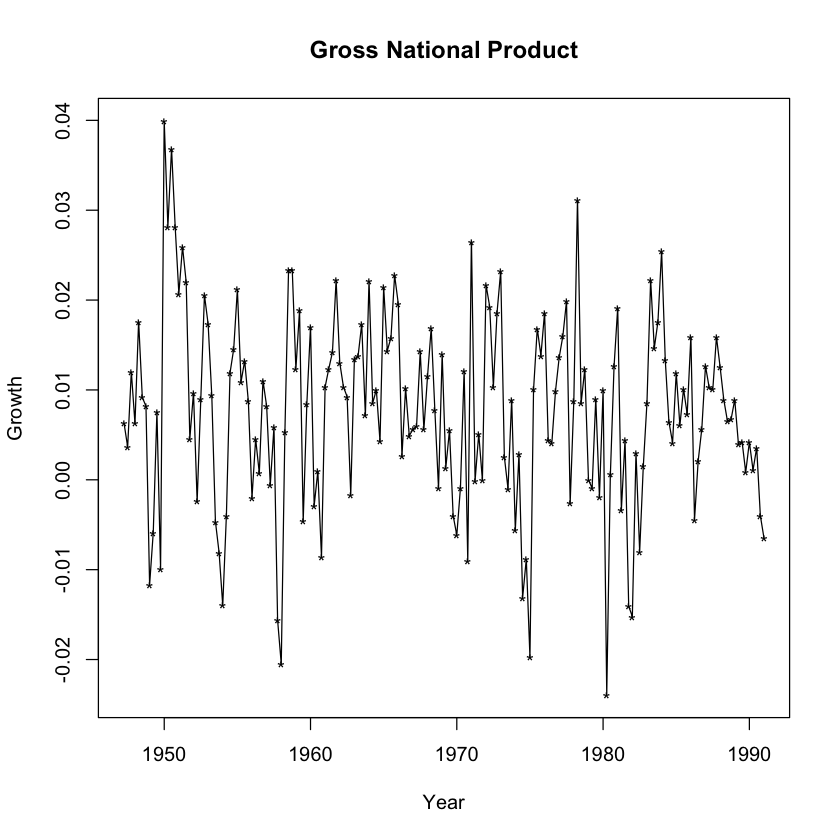

In [25]:
plot_time_fig(gnp1, main = "Gross National Product", xlab = "Year", ylab = "Growth")

- Find the AR order using AIC

In [10]:
m1 = ar(gnp, method = 'mle')
m1$order

[1] 3

In [11]:
m2 = arima(gnp, order = c(3, 0, 0))
m2


Call:
arima(x = gnp, order = c(3, 0, 0))

Coefficients:
         ar1     ar2      ar3  intercept
      0.3480  0.1793  -0.1423     0.0077
s.e.  0.0745  0.0778   0.0745     0.0012

sigma^2 estimated as 9.427e-05:  log likelihood = 565.84,  aic = -1121.68

- $\phi_0 = \mu*(1-\phi_1-\phi_2-\phi_3)$

In [15]:
cal_phi_0(m2, ord=3)

[1] "0.00472311"


[1] 0.004723112

Residual standar error

In [52]:
sqrt(m2$sigma2)

[1] 0.009709322

- Characteristic equation

In [57]:
?polyroot

In [53]:
p1 = c(1, -m2$coef[1:3])
roots = polyroot(p1)
roots

[1]  1.590253+1.063882i -1.920152-0.000000i  1.590253-1.063882i

In [71]:
for (i in 1:3) {
    print(i)
    print(as.numeric(Mod(1-m2$coef[1]*roots[i]-m2$coef[2]*roots[i]^2-m2$coef[3]*roots[i]^3)))
}

[1] 1
[1] 2.237726e-16
[1] 2
[1] 4.641385e-16
[1] 3
[1] 2.237726e-16


- Absolute values of the solutions

In [77]:
roots; Mod(roots)

[1]  1.590253+1.063882i -1.920152-0.000000i  1.590253-1.063882i

[1] 1.913308 1.920152 1.913308

In [76]:
1/roots; Mod(1/roots)

[1]  0.4344065-0.2906186i -0.5207921+0.0000000i  0.4344065+0.2906186i

[1] 0.5226550 0.5207921 0.5226550

- Compute the average length of business cycles
- Doesn't matter if using the characteristic roots or the inverse of them.

In [80]:
k = 2*pi/acos(0.434406493995099/0.522654950320849)
k

[1] 10.65638

In [81]:
k = 2*pi/acos(1.59025281352281/1.91330819575347)
k

[1] 10.65638

## AIC

In [84]:
gnp = scan(file = '../AFTS_data/Ch02/dgnp82.txt')
ord = ar(gnp, method = 'mle')
format(ord$aic, digits = 6)

0           1           2           3           4           5 
"27.846690" " 2.741632" " 1.603242" " 0.000000" " 0.302785" " 2.242661" 
          6           7           8           9          10          11 
" 4.052084" " 6.025475" " 5.904668" " 7.571863" " 7.895334" " 9.678873" 
         12 
" 7.197545"

In [86]:
ord$order; ord$order.max

[1] 3

[1] 12

## AR(3) example

In [1]:
da = read.table("../AFTS_data/Ch02/m-ibm3dx2608.txt", header = T)
da[1:5,]

,date,ibmrtn,vwrtn,ewrtn,sprtn
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,19260130,-0.010381,0.000724,0.023174,0.022472
2,19260227,-0.024476,-0.033374,-0.053510,-0.043956
3,19260331,-0.115591,-0.064341,-0.096824,-0.059113
4,19260430,0.089783,0.038358,0.032946,0.022688
5,19260528,0.036932,0.012172,0.001035,0.007679


### Parameter estimation for value-weighted index

- Try simple return

In [26]:
vwrtn_m3 = arima(da$vwrtn, order = c(3, 0, 0))
vwrtn_m3


Call:
arima(x = da$vwrtn, order = c(3, 0, 0))

Coefficients:
         ar1      ar2      ar3  intercept
      0.1158  -0.0187  -0.1042     0.0089
s.e.  0.0315   0.0317   0.0317     0.0017

sigma^2 estimated as 0.002875:  log likelihood = 1500.86,  aic = -2991.73

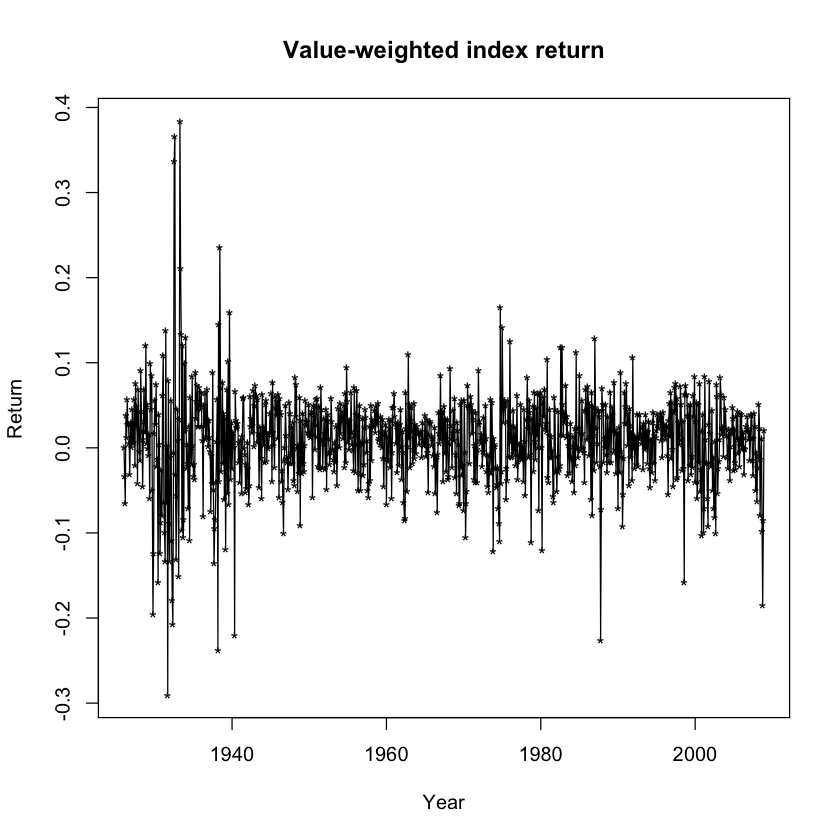

In [31]:
vwrtn_ts = ts(da$vwrtn, frequency = 12, start = c(1926, 1))
plot_time_fig(vwrtn_ts, main = "Value-weighted index return", xlab = "Year", ylab = "Return")

In [63]:
est_mrtn = cal_mu(vwrtn_m3)
(1+est_mrtn)^12-1

[1] "0.00894788"


[1] 0.1128196

- Try log-return

In [64]:
lvwrtn_m3 = arima(log(1+da$vwrtn), order = c(3, 0, 0))
lvwrtn_m3


Call:
arima(x = log(1 + da$vwrtn), order = c(3, 0, 0))

Coefficients:
         ar1      ar2      ar3  intercept
      0.1105  -0.0139  -0.0953     0.0074
s.e.  0.0315   0.0317   0.0318     0.0017

sigma^2 estimated as 0.002886:  log likelihood = 1498.89,  aic = -2987.78

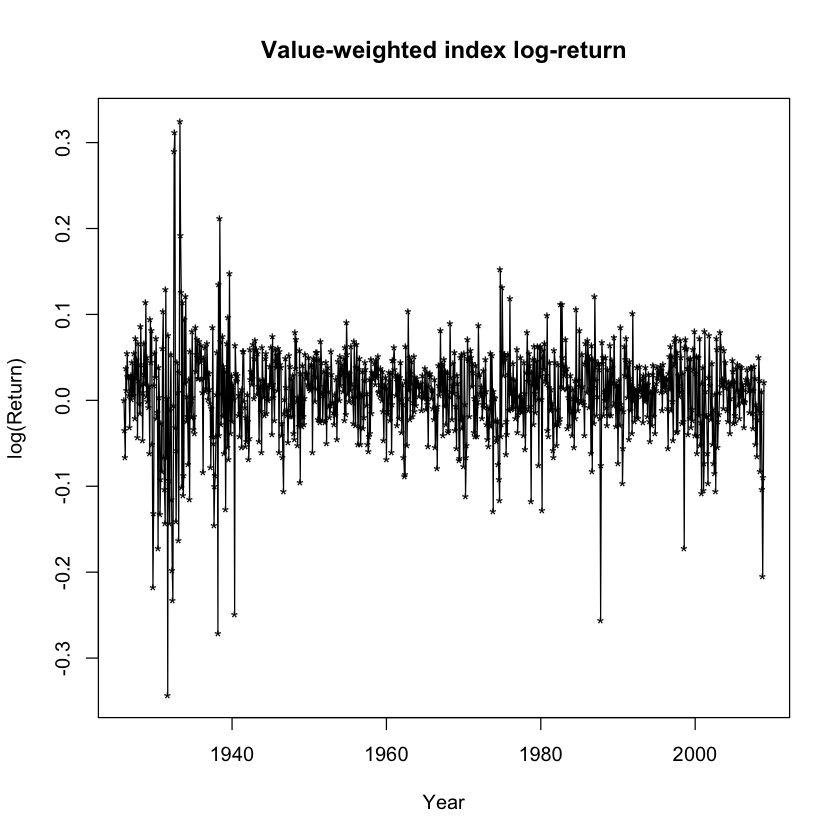

In [36]:
lvwrtn_ts = ts(log(1+da$vwrtn), frequency = 12, start = c(1926, 1))
plot_time_fig(lvwrtn_ts, main = "Value-weighted index log-return", xlab = "Year", ylab = "log(Return)")

In [65]:
est_mlrtn = cal_mu(lvwrtn_m3)
exp(est_mlrtn*12)-1

[1] "0.00744436"


[1] 0.0934439

### Calculate the actual yearly return
- The `9.3%` per annum is close to `11.3%` per annum from the estimated model on simple return.
- If I transfer the simple return to log return using `log(1+rtn)`, the estimated return per annum is `9.3%`, which is closer to the actual value.

In [90]:
vw = da$vwrtn # Value-weighted index
t1 = prod(vw+1) # Simple gross return
t1; length(vw); t1^(12/length(vw))-1; # monthly return per annum

[1] 1592.953

[1] 996

[1] 0.09290084

## Model checking

In [40]:
m3 = arima(da$vwrtn, order = c(3, 0, 0))
m3


Call:
arima(x = da$vwrtn, order = c(3, 0, 0))

Coefficients:
         ar1      ar2      ar3  intercept
      0.1158  -0.0187  -0.1042     0.0089
s.e.  0.0315   0.0317   0.0317     0.0017

sigma^2 estimated as 0.002875:  log likelihood = 1500.86,  aic = -2991.73

- Compute the intercept $\phi_0 = \mu*(1-\phi_1-\phi_2-\phi_3)$

In [41]:
cal_phi_0(m3, ord=3)

[1] "0.00901194"


[1] 0.009011937

- Compute the standard error of residuals

In [42]:
attributes(m3)

$names
 [1] "coef"      "sigma2"    "var.coef"  "mask"      "loglik"    "aic"      
 [7] "arma"      "residuals" "call"      "series"    "code"      "n.cond"   
[13] "nobs"      "model"    

$class
[1] "Arima"

In [43]:
c(
    sqrt(sum(m3$residuals^2)/(m3$nobs-2*length(m3$coef)-1)),
    sqrt(sum(m3$residuals^2)/(m3$nobs-length(m3$coef))),
    sqrt(sum(m3$residuals^2)/m3$nobs)
)

[1] 0.05386281 0.05372689 0.05361890

In [44]:
sqrt(m3$sigma2)

[1] 0.0536189

- Ljung-Box test (R uses 12 dof)

In [45]:
Box.test(m3$residuals, lag = 12, type = 'Ljung')


	Box-Ljung test

data:  m3$residuals
X-squared = 16.352, df = 12, p-value = 0.1756


- Compute p-value using 9 dof (`12-3=9`, the parameter for AR does not include the intercept.)

In [122]:
pv = 1-pchisq(16.35,9)
pv

[1] 0.05992276

- Refine the model to rule out statistically insignificant coef by fixing the AR(2) coef to zero (pp51)

In [362]:
mm3 = arima(da$vwrtn, order = c(3,0,0), fixed = c(NA,0,NA,NA))
mm3

Warning message in arima(da$vwrtn, order = c(3, 0, 0), fixed = c(NA, 0, NA, NA)):
“some AR parameters were fixed: setting transform.pars = FALSE”



Call:
arima(x = da$vwrtn, order = c(3, 0, 0), fixed = c(NA, 0, NA, NA))

Coefficients:
         ar1  ar2      ar3  intercept
      0.1136    0  -0.1063     0.0089
s.e.  0.0313    0   0.0315     0.0017

sigma^2 estimated as 0.002876:  log likelihood = 1500.69,  aic = -2993.38

In [366]:
mm3_1 = arima(da$vwrtn, order = c(3,0,0), fixed = c(NA,0,NA,NA), method = "ML")
mm3_1; cal_phi_0(mm3_1, ord = 3)

Warning message in arima(da$vwrtn, order = c(3, 0, 0), fixed = c(NA, 0, NA, NA), :
“some AR parameters were fixed: setting transform.pars = FALSE”



Call:
arima(x = da$vwrtn, order = c(3, 0, 0), fixed = c(NA, 0, NA, NA), method = "ML")

Coefficients:
         ar1  ar2      ar3  intercept
      0.1136    0  -0.1063     0.0089
s.e.  0.0313    0   0.0315     0.0017

sigma^2 estimated as 0.002876:  log likelihood = 1500.69,  aic = -2993.38

[1] "0.0088825"


[1] 0.0088825

In [367]:
mm3_2 = arima(da$vwrtn, order = c(3,0,0), fixed = c(NA,0,NA,NA), method = "CSS")
mm3_2; cal_phi_0(mm3_2, ord = 3)

Warning message in arima(da$vwrtn, order = c(3, 0, 0), fixed = c(NA, 0, NA, NA), :
“some AR parameters were fixed: setting transform.pars = FALSE”



Call:
arima(x = da$vwrtn, order = c(3, 0, 0), fixed = c(NA, 0, NA, NA), method = "CSS")

Coefficients:
         ar1  ar2      ar3  intercept
      0.1126    0  -0.1064     0.0091
s.e.  0.0313    0   0.0315     0.0017

sigma^2 estimated as 0.002878:  part log likelihood = 1500.33

[1] "0.00899938"


[1] 0.008999382

In [368]:
mm3_3 = arima(da$vwrtn, order = c(3,0,0), fixed = c(NA,0,NA,NA), method = "CSS-ML")
mm3_3; cal_phi_0(mm3_3, ord = 3)

Warning message in arima(da$vwrtn, order = c(3, 0, 0), fixed = c(NA, 0, NA, NA), :
“some AR parameters were fixed: setting transform.pars = FALSE”



Call:
arima(x = da$vwrtn, order = c(3, 0, 0), fixed = c(NA, 0, NA, NA), method = "CSS-ML")

Coefficients:
         ar1  ar2      ar3  intercept
      0.1136    0  -0.1063     0.0089
s.e.  0.0313    0   0.0315     0.0017

sigma^2 estimated as 0.002876:  log likelihood = 1500.69,  aic = -2993.38

[1] "0.00888153"


[1] 0.008881533

In [47]:
cal_phi_0(mm3, ord = 3)

[1] "0.00888153"


[1] 0.008881533

- In the `arima` software, when estimating the residual variance, they use sample size $T$, instead of $T-2*p-1$.

In [56]:
sum(mm3$residuals^2)/(length(da$vwrtn)); mm3$sigma2; sqrt(mm3$sigma2)

[1] 0.002875997

[1] 0.002875997

[1] 0.05362832

In [49]:
box_test <- Box.test(mm3$residuals, lag = 12, type = 'Ljung')
box_test


	Box-Ljung test

data:  mm3$residuals
X-squared = 16.828, df = 12, p-value = 0.1562


In [50]:
attributes(box_test)

$names
[1] "statistic" "parameter" "p.value"   "method"    "data.name"

$class
[1] "htest"

- Compute p-value using 10 dof (`12-2=10`, the parameter for AR does not include the intercept.)

In [51]:
pv = as.numeric(1-pchisq(box_test$statistic, 10))
pv; box_test$statistic

[1] 0.0782661

X-squared 
 16.82763

## AR(3) forecasting example

In [70]:
install.packages("forecast")

also installing the dependencies ‘farver’, ‘labeling’, ‘munsell’, ‘R6’, ‘RColorBrewer’, ‘viridisLite’, ‘pkgconfig’, ‘xts’, ‘TTR’, ‘curl’, ‘gtable’, ‘isoband’, ‘scales’, ‘tibble’, ‘withr’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘generics’, ‘ggplot2’, ‘lmtest’, ‘magrittr’, ‘tseries’, ‘RcppArmadillo’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [71]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [190]:
f_da_ts = ts(da$vwrtn[1:tr_n], frequency = 12, start = c(1926, 1))
ts_fm3 = arima(f_da_ts, order = c(3,0,0))
ts_fc_res = forecast(ts_fm3, h = 12)
ts_fc_res

         Point Forecast       Lo 80      Hi 80       Lo 95     Hi 95
Jan 2008    0.007455686 -0.06083694 0.07574831 -0.09698887 0.1119002
Feb 2008    0.015952488 -0.05270459 0.08460957 -0.08904946 0.1209544
Mar 2008    0.011701663 -0.05695841 0.08036174 -0.09330486 0.1167082
Apr 2008    0.009806653 -0.05927763 0.07889093 -0.09584863 0.1154619
May 2008    0.008770886 -0.06033071 0.07787249 -0.09691089 0.1144527
Jun 2008    0.009164644 -0.05993698 0.07826627 -0.09651718 0.1148465
Jul 2008    0.009432520 -0.05967458 0.07853962 -0.09625768 0.1151227
Aug 2008    0.009565095 -0.05954249 0.07867268 -0.09612583 0.1152560
Sep 2008    0.009530555 -0.05957703 0.07863814 -0.09616037 0.1152215
Oct 2008    0.009495151 -0.05961250 0.07860281 -0.09619589 0.1151862
Nov 2008    0.009477748 -0.05962992 0.07858541 -0.09621331 0.1151688
Dec 2008    0.009480420 -0.05962725 0.07858808 -0.09621063 0.1151715

In [192]:
cal_phi_0(ts_fm3, ord = 3)

[1] "0.00972842"


[1] 0.009728423

In [193]:
sqrt(ts_fm3$sigma2)

[1] 0.05328902

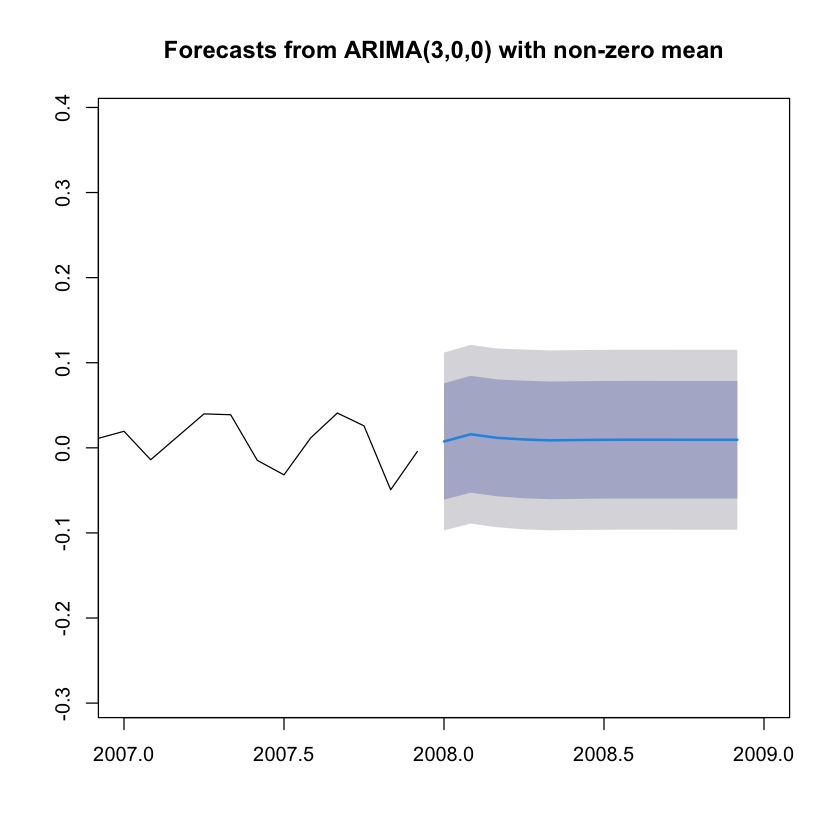

In [189]:
par(bg = "white")
xend = end(f_da_ts)[1]+end(f_da_ts)[2]/12
xmin = xend-1
xmax = xend+1
plot(ts_fc_res, xlim = c(xmin, xmax))

In [281]:
attributes(ts_fc_res)

$names
 [1] "method"    "model"     "level"     "mean"      "lower"     "upper"    
 [7] "x"         "series"    "fitted"    "residuals"

$class
[1] "forecast"

- Make multi-steps forecast plots (Fig. 2.7)

2006.917 ; 2009

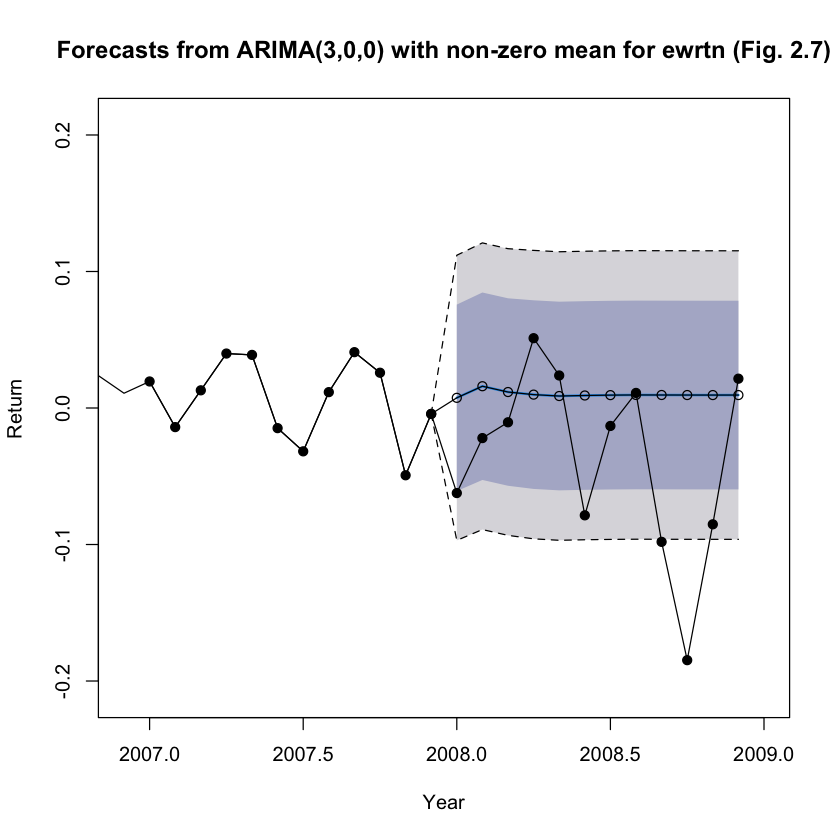

In [421]:
freq = 12
vwrtn_ts = ts(da$vwrtn, frequency = freq, start = c(1926, 1))
eotr=984
ts_fc_res = plot_forecast_fig(
    da_ts=vwrtn_ts, 
    eotr=eotr, h=12, npts=12, frequency=freq, 
    order=c(3,0,0), fixed=NULL, method=NULL, transform_pars=NULL,
    main="Forecasts from ARIMA(3,0,0) with non-zero mean for ewrtn (Fig. 2.7)", 
    xlab="Year", ylab="Return", ylim=c(-0.21, 0.21)
)

- Forecast values (Table 2.2)

In [292]:
summary(ts_fc_res)


Forecast method: ARIMA(3,0,0) with non-zero mean

Model Information:

Call:
arima(x = tr_da_ts, order = c(3, 0, 0))

Coefficients:
         ar1      ar2      ar3  intercept
      0.1034  -0.0201  -0.1089     0.0095
s.e.  0.0317   0.0318   0.0317     0.0017

sigma^2 estimated as 0.00284:  log likelihood = 1488.85,  aic = -2967.71

Error measures:
                        ME       RMSE        MAE      MPE     MAPE      MASE
Training set -1.234691e-05 0.05328902 0.03757996 101.6395 166.5597 0.7001715
                    ACF1
Training set 0.002856914

Forecasts:
         Point Forecast       Lo 80      Hi 80       Lo 95     Hi 95
Jan 2008    0.007455686 -0.06083694 0.07574831 -0.09698887 0.1119002
Feb 2008    0.015952488 -0.05270459 0.08460957 -0.08904946 0.1209544
Mar 2008    0.011701663 -0.05695841 0.08036174 -0.09330486 0.1167082
Apr 2008    0.009806653 -0.05927763 0.07889093 -0.09584863 0.1154619
May 2008    0.008770886 -0.06033071 0.07787249 -0.09691089 0.1144527
Jun 2008    0.0091646

In [445]:
install_redir_output(lib = "knitr", log_fname = "knitr_install.log")

also installing the dependencies ‘highr’, ‘xfun’, ‘yaml’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [502]:
vwrtn_multistep_ahead_forecast_tb <- comb_forecast_res(ts_fc_res, vwrtn_ts, eotr, freq)
vwrtn_multistep_ahead_forecast_tb


Forecast method: ARIMA(3,0,0) with non-zero mean

Model Information:

Call:
arima(x = tr_da_ts, order = order, fixed = fixed, method = method)

Coefficients:
         ar1      ar2      ar3  intercept
      0.1034  -0.0201  -0.1089     0.0095
s.e.  0.0317   0.0318   0.0317     0.0017

sigma^2 estimated as 0.00284:  log likelihood = 1488.85,  aic = -2967.71

Error measures:
                        ME       RMSE        MAE      MPE     MAPE      MASE
Training set -1.234691e-05 0.05328902 0.03757996 101.6395 166.5597 0.7001715
                    ACF1
Training set 0.002856914

Forecasts:
         Point Forecast       Lo 80      Hi 80       Lo 95     Hi 95
Jan 2008    0.007455686 -0.06083694 0.07574831 -0.09698887 0.1119002
Feb 2008    0.015952488 -0.05270459 0.08460957 -0.08904946 0.1209544
Mar 2008    0.011701663 -0.05695841 0.08036174 -0.09330486 0.1167082
Apr 2008    0.009806653 -0.05927763 0.07889093 -0.09584863 0.1154619
May 2008    0.008770886 -0.06033071 0.07787249 -0.09691089 0.11

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,0.007455686,0.015952488,0.011701663,0.009806653,0.008770886,0.009164644,0.009432520,0.009565095,0.009530555,0.009495151,0.009477748,0.009480420


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,0.05328902,0.05357340,0.05357574,0.05390675,0.05392026,0.05392029,0.05392456,0.05392493,0.05392493,0.05392499,0.05392500,0.05392500


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,-0.062305,-0.022040,-0.010470,0.051144,0.023825,-0.078625,-0.013150,0.011042,-0.098060,-0.184726,-0.085206,0.021482


,Forecast,Std. Error,Actual
Jan 2008,0.007455686,0.05328902,-0.062305
Feb 2008,0.015952488,0.05357340,-0.022040
Mar 2008,0.011701663,0.05357574,-0.010470
Apr 2008,0.009806653,0.05390675,0.051144
May 2008,0.008770886,0.05392026,0.023825
Jun 2008,0.009164644,0.05392029,-0.078625
Jul 2008,0.009432520,0.05392456,-0.013150
Aug 2008,0.009565095,0.05392493,0.011042
Sep 2008,0.009530555,0.05392493,-0.098060
Oct 2008,0.009495151,0.05392499,-0.184726


In [497]:
class(vwrtn_multistep_ahead_forecast_tb); attributes(vwrtn_multistep_ahead_forecast_tb)

[1] "mts"    "ts"     "matrix" "array"

$dim
[1] 12  3

$dimnames
$dimnames[[1]]
NULL

$dimnames[[2]]
[1] "Forecast"   "Std. Error" "Actual"    


$tsp
[1] 2008.000 2008.917   12.000

$class
[1] "mts"    "ts"     "matrix" "array"

# Sec. 2.5
- See `arima` doc: [link](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/arima.html)

## MA(9) fitting with fixed coefs example (Sec. 2.5.3)

In [349]:
da = read.table("../AFTS_data/Ch02/m-ibm3dx2608.txt", header = T)
da[1:5,]

,date,ibmrtn,vwrtn,ewrtn,sprtn
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,19260130,-0.010381,0.000724,0.023174,0.022472
2,19260227,-0.024476,-0.033374,-0.053510,-0.043956
3,19260331,-0.115591,-0.064341,-0.096824,-0.059113
4,19260430,0.089783,0.038358,0.032946,0.022688
5,19260528,0.036932,0.012172,0.001035,0.007679


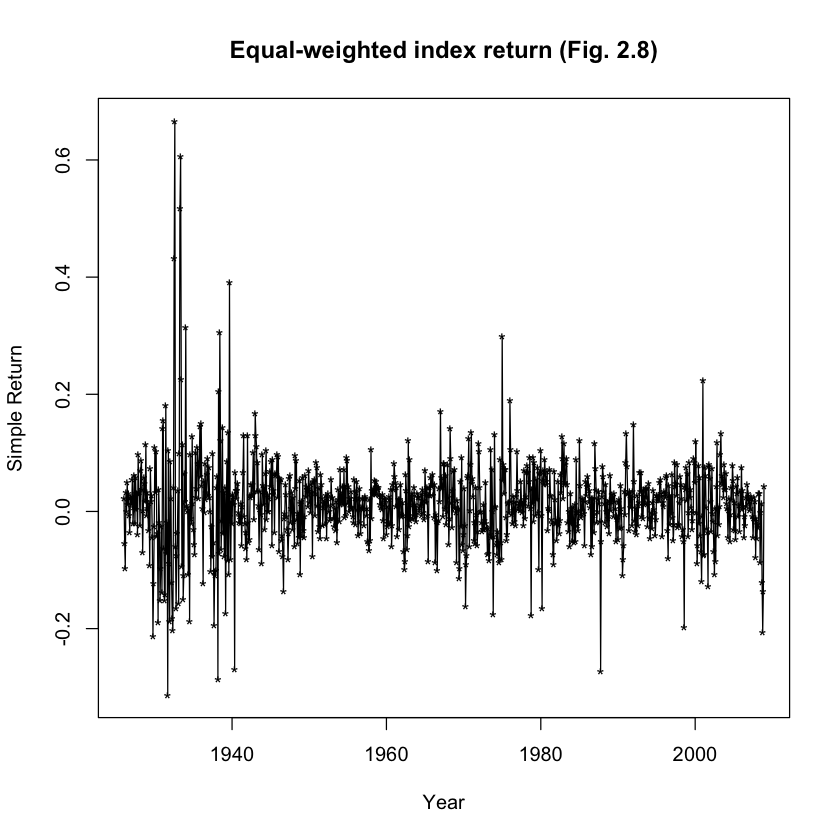

In [415]:
ewrtn_ts = ts(da$ewrtn, frequency = freq, start = c(1926, 1))
plot_time_fig(ts = ewrtn_ts, main = "Equal-weighted index return (Fig. 2.8)", xlab = "Year", ylab = "Simple Return")

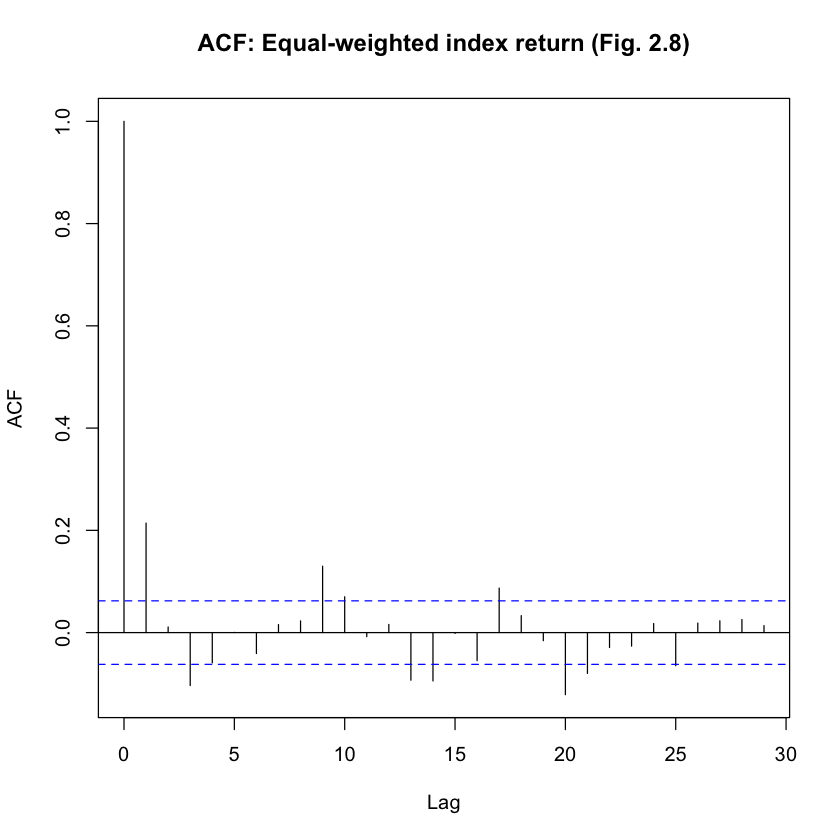

In [416]:
par(bg = "white")
acf(da$ewrtn, main = "ACF: Equal-weighted index return (Fig. 2.8)")

In [360]:
find("arima")

[1] "package:stats"

- Fit `MA(9)` process

In [388]:
ewrtn_ma_mod = arima(
    da$ewrtn, 
    order = c(0,0,9), 
    fixed = c(NA, 0, NA, 0, 0, 0, 0, 0, NA, NA), # Include the mean
    transform.pars = F # Doesn't make difference
)
ewrtn_ma_mod; sqrt(ewrtn_ma_mod$sigma2)


Call:
arima(x = da$ewrtn, order = c(0, 0, 9), transform.pars = F, fixed = c(NA, 0, 
    NA, 0, 0, 0, 0, 0, NA, NA))

Coefficients:
         ma1  ma2      ma3  ma4  ma5  ma6  ma7  ma8     ma9  intercept
      0.1909    0  -0.1199    0    0    0    0    0  0.1227     0.0122
s.e.  0.0293    0   0.0338    0    0    0    0    0  0.0312     0.0027

sigma^2 estimated as 0.005097:  log likelihood = 1215.61,  aic = -2421.22

[1] 0.07139367

In [389]:
ewrtn_ma_mod_1 = arima(
    da$ewrtn, 
    order = c(0,0,9), 
    fixed = c(NA, 0, NA, 0, 0, 0, 0, 0, NA, NA),
    method = 'ML',
    transform.pars = F # Doesn't make difference
)
ewrtn_ma_mod_1; sqrt(ewrtn_ma_mod_1$sigma2)


Call:
arima(x = da$ewrtn, order = c(0, 0, 9), transform.pars = F, fixed = c(NA, 0, 
    NA, 0, 0, 0, 0, 0, NA, NA), method = "ML")

Coefficients:
         ma1  ma2      ma3  ma4  ma5  ma6  ma7  ma8     ma9  intercept
      0.1909    0  -0.1199    0    0    0    0    0  0.1227     0.0122
s.e.  0.0293    0   0.0338    0    0    0    0    0  0.0312     0.0027

sigma^2 estimated as 0.005097:  log likelihood = 1215.61,  aic = -2421.22

[1] 0.07139368

In [390]:
ewrtn_ma_mod_2 = arima(
    da$ewrtn, 
    order = c(0,0,9), 
    fixed = c(NA, 0, NA, 0, 0, 0, 0, 0, NA, NA),
    method = 'CSS',
    transform.pars = F # Doesn't make difference
)
ewrtn_ma_mod_2; sqrt(ewrtn_ma_mod_2$sigma2)


Call:
arima(x = da$ewrtn, order = c(0, 0, 9), transform.pars = F, fixed = c(NA, 0, 
    NA, 0, 0, 0, 0, 0, NA, NA), method = "CSS")

Coefficients:
         ma1  ma2      ma3  ma4  ma5  ma6  ma7  ma8     ma9  intercept
      0.1909    0  -0.1198    0    0    0    0    0  0.1232     0.0122
s.e.  0.0293    0   0.0338    0    0    0    0    0  0.0313     0.0027

sigma^2 estimated as 0.005098:  part log likelihood = 1215.65

[1] 0.0713988

In [394]:
ewrtn_ma_mod_3 = arima(
    da$ewrtn, 
    order = c(0,0,9), 
    fixed = c(NA, 0, NA, 0, 0, 0, 0, 0, NA, NA),
    method = 'CSS-ML',
    transform.pars = F # Doesn't make difference
)
ewrtn_ma_mod_3; sqrt(ewrtn_ma_mod_3$sigma2)


Call:
arima(x = da$ewrtn, order = c(0, 0, 9), transform.pars = F, fixed = c(NA, 0, 
    NA, 0, 0, 0, 0, 0, NA, NA), method = "CSS-ML")

Coefficients:
         ma1  ma2      ma3  ma4  ma5  ma6  ma7  ma8     ma9  intercept
      0.1909    0  -0.1199    0    0    0    0    0  0.1227     0.0122
s.e.  0.0293    0   0.0338    0    0    0    0    0  0.0312     0.0027

sigma^2 estimated as 0.005097:  log likelihood = 1215.61,  aic = -2421.22

[1] 0.07139367

- Box-Ljung test (us 12 dof)

In [391]:
box_test_res = Box.test(ewrtn_ma_mod$residuals, lag = 12, type = 'Ljung');
box_test_res; 1-pchisq(box_test_res$statistic, df = 9); 1-pchisq(box_test_res$statistic, df = 12)


	Box-Ljung test

data:  ewrtn_ma_mod$residuals
X-squared = 17.604, df = 12, p-value = 0.1283


X-squared 
0.04005609

X-squared 
0.1282546

In [392]:
box_test_res_1 = Box.test(ewrtn_ma_mod_1$residuals, lag = 12, type = 'Ljung');
box_test_res_1; 1-pchisq(box_test_res_1$statistic, df = 9); 1-pchisq(box_test_res_1$statistic, df = 12)


	Box-Ljung test

data:  ewrtn_ma_mod_1$residuals
X-squared = 17.603, df = 12, p-value = 0.1283


X-squared 
0.04007017

X-squared 
0.1282902

In [393]:
box_test_res_2 = Box.test(ewrtn_ma_mod_2$residuals, lag = 12, type = 'Ljung');
box_test_res_2; 1-pchisq(box_test_res_2$statistic, df = 9); 1-pchisq(box_test_res_2$statistic, df = 12)


	Box-Ljung test

data:  ewrtn_ma_mod_2$residuals
X-squared = 17.621, df = 12, p-value = 0.1277


X-squared 
0.03983965

X-squared 
0.1277063

In [395]:
box_test_res_3 = Box.test(ewrtn_ma_mod_3$residuals, lag = 12, type = 'Ljung');
box_test_res_3; 1-pchisq(box_test_res_3$statistic, df = 9); 1-pchisq(box_test_res_3$statistic, df = 12)


	Box-Ljung test

data:  ewrtn_ma_mod_3$residuals
X-squared = 17.604, df = 12, p-value = 0.1283


X-squared 
0.04005609

X-squared 
0.1282546

## MA(9) forecasting (Sec. 2.5.4)

- Plot the forecasting

2007.083 ; 2009

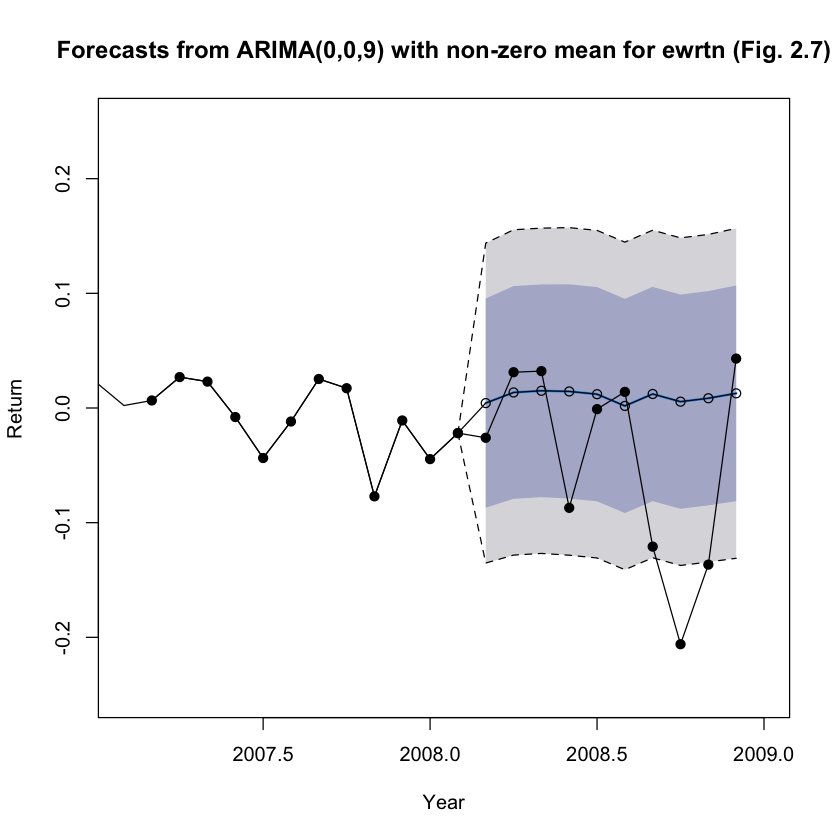

In [503]:
eotr = 986
h = 10
npts = 12
freq = 12
order = c(0,0,9)
fixed = c(NA, 0, NA, 0, 0, 0, 0, 0, NA, NA)
ewrtn_fc_res = plot_forecast_fig(
    da_ts=ewrtn_ts, eotr=eotr, h=10, npts=npts, frequency=freq, 
    order=order, fixed=fixed, method='ML', transform_pars=F,
    main="Forecasts from ARIMA(0,0,9) with non-zero mean for ewrtn (Fig. 2.7)", 
    xlab="Year", ylab="Return", ylim=c(-0.25, 0.25)
)

- Forecasting results

In [504]:
ewrtn_multistep_ahead_forecast_tb = comb_forecast_res(
    forecast_obj=ewrtn_fc_res, 
    da_ts=ewrtn_ts, 
    eotr=eotr, 
    freq=freq
)
ewrtn_multistep_ahead_forecast_tb


Forecast method: ARIMA(0,0,9) with non-zero mean

Model Information:

Call:
arima(x = tr_da_ts, order = order, transform.pars = transform_pars, fixed = fixed, 
    method = method)

Coefficients:
         ma1  ma2      ma3  ma4  ma5  ma6  ma7  ma8     ma9  intercept
      0.1844    0  -0.1206    0    0    0    0    0  0.1218     0.0128
s.e.  0.0295    0   0.0338    0    0    0    0    0  0.0312     0.0027

sigma^2 estimated as 0.005066:  log likelihood = 1206.44,  aic = -2402.88

Error measures:
                        ME       RMSE        MAE      MPE     MAPE      MASE
Training set -1.916748e-05 0.07117457 0.04750136 94.10055 214.5367 0.6922456
                   ACF1
Training set 0.02241295

Forecasts:
         Point Forecast       Lo 80      Hi 80      Lo 95     Hi 95
Mar 2008    0.004284404 -0.08692947 0.09549828 -0.1352152 0.1437840
Apr 2008    0.013560426 -0.07919123 0.10631208 -0.1282910 0.1554118
May 2008    0.015025565 -0.07772609 0.10777722 -0.1268258 0.1568770
Jun 2008    

,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,0.004284404,0.013560426,0.015025565,0.014453940,0.012047087,0.001806804,0.012211891,0.005515984,0.008514008,0.012792573


,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,0.07117457,0.07237450,0.07237450,0.07288140,0.07288140,0.07288140,0.07288140,0.07288140,0.07288140,0.07339524


,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,-0.025971,0.031213,0.032178,-0.087065,-0.000994,0.014066,-0.120888,-0.206004,-0.136597,0.043083


,Forecast,Std. Error,Actual
Mar 2008,0.004284404,0.07117457,-0.025971
Apr 2008,0.013560426,0.07237450,0.031213
May 2008,0.015025565,0.07237450,0.032178
Jun 2008,0.014453940,0.07288140,-0.087065
Jul 2008,0.012047087,0.07288140,-0.000994
Aug 2008,0.001806804,0.07288140,0.014066
Sep 2008,0.012211891,0.07288140,-0.120888
Oct 2008,0.005515984,0.07288140,-0.206004
Nov 2008,0.008514008,0.07288140,-0.136597
Dec 2008,0.012792573,0.07339524,0.043083


# Sec. 2.7

## 3M log price

In [506]:
da = read.table("../AFTS_data/Ch02/m-3m4608.txt", header = T)
da[1:5,]

,date,rtn
,<int>,<dbl>
1,19460228,-0.077922
2,19460330,0.018592
3,19460430,-0.100000
4,19460531,0.209877
5,19460628,0.005128


- See the t-statistics and p-value of mean of log returns

In [509]:
lrtn = log(1+da$rtn)
lrtn_ts = ts(lrtn, frequency = 12, start = c(1946, 2))

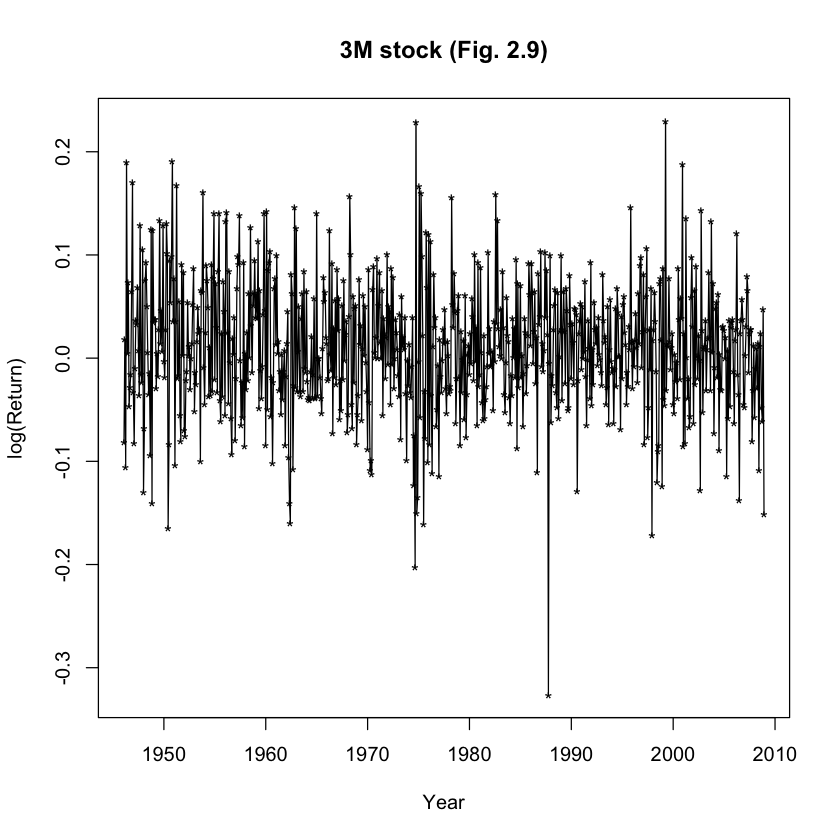

In [511]:
plot_time_fig(lrtn_ts, main = "3M stock (Fig. 2.9)", xlab = "Year", ylab = "log(Return)")

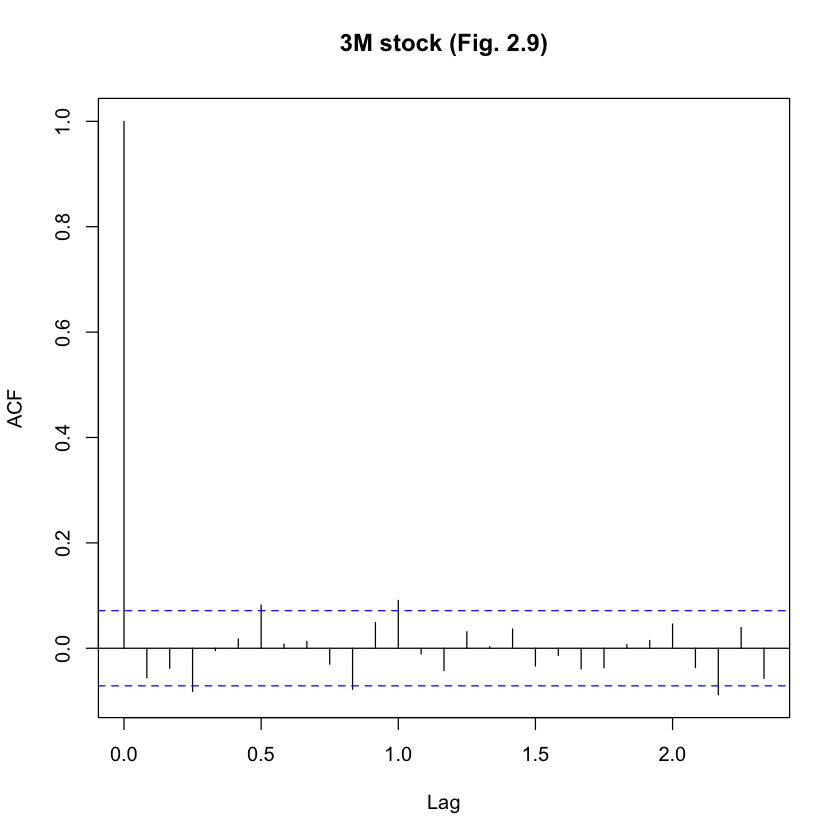

In [513]:
par(bg = "white")
acf(lrtn_ts, main = "3M stock (Fig. 2.9)")

In [151]:
t_stats = mean(lrtn)/(sd(lrtn)/sqrt(length(lrtn)))
pv = 2*(1-pnorm(abs(t_stats)))

mean(lrtn); 
sd(lrtn); 
sd(lrtn)/sqrt(length(lrtn)); # variance of the mean of the log returns
t_stats; 
pv

[1] 0.01029941

[1] 0.0637191

[1] 0.002318975

[1] 4.441363

[1] 8.939078e-06

- Construct two price series
    - Using log return
    - Using mean-corrected log return

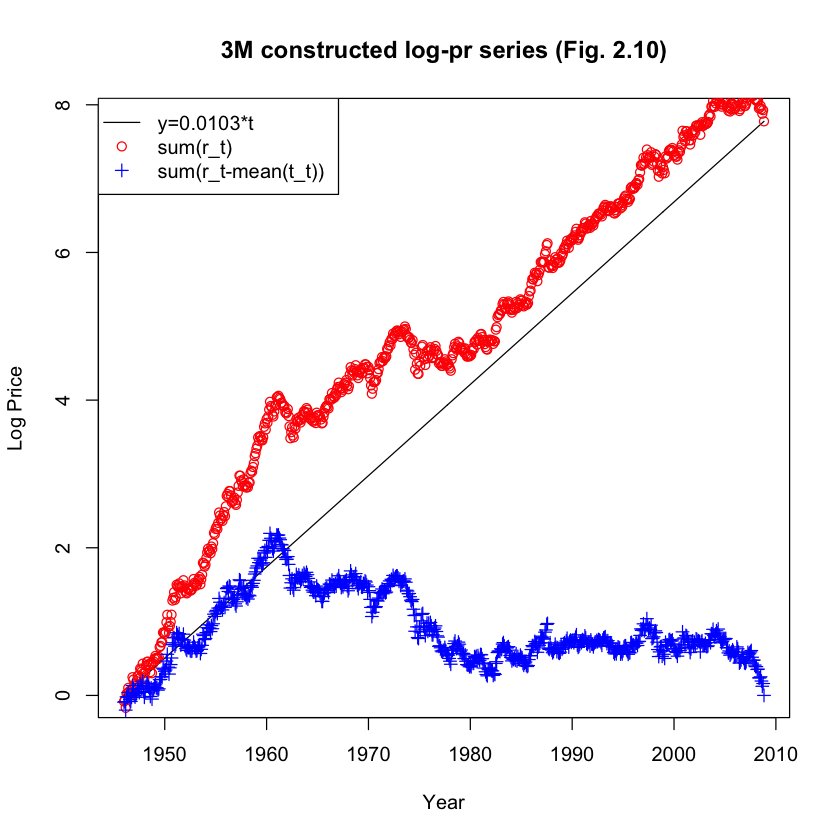

In [168]:
pt1 = cumsum(lrtn)
pt2 = cumsum(lrtn-mean(lrtn))
pt1_ts = ts(pt1, frequency = 12, start = c(1946, 1))
pt2_ts = ts(pt2, frequency = 12, start = c(1946, 1))
ln_ts = ts(mean(lrtn)*seq(from = 1, to = length(lrtn), by = 1), frequency = 12, start = c(1946, 1))
par(bg = "white")
plot(ln_ts, col = 'black', type = 'l', main = '3M constructed log-pr series (Fig. 2.10)', xlab = "Year", ylab = "Log Price")
# plot(pt1_ts, type = 'p', pch = 1, main = '3M constructed log-pr series', xlab = "Year", ylab = "Log Price")
points(pt1_ts, col = 'red', pch = 1)
points(pt2_ts, col = 'blue', pch = 3)
# Add legend
legend(
    "topleft", 
    legend = c("y=0.0103*t", "sum(r_t)", "sum(r_t-mean(t_t))"), 
    col = c("black", "red", "blue"), 
    lty = c(1, NA, NA),
    pch = c(NA, 1, 3)
)

## Unit root test (U.S. quarterly GDP)

In [173]:
da = read.table("../AFTS_data/Ch02/q-gdp4708.txt", header = T)
da[1:5,]

,year,mon,day,gdp
,<int>,<int>,<int>,<dbl>
1,1947,1,1,237.2
2,1947,4,1,240.5
3,1947,7,1,244.6
4,1947,10,1,254.4
5,1948,1,1,260.4


In [175]:
lgdp = log(da$gdp)
m1 = ar(diff(lgdp), method = 'mle')
m1$order

[1] 10

In [176]:
adfTest(lgdp, lags = 10, type = c("c"))


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 10
  STATISTIC:
    Dickey-Fuller: -1.6109
  P VALUE:
    0.4569 

Description:
 Wed Feb 14 03:37:31 2024 by user: 

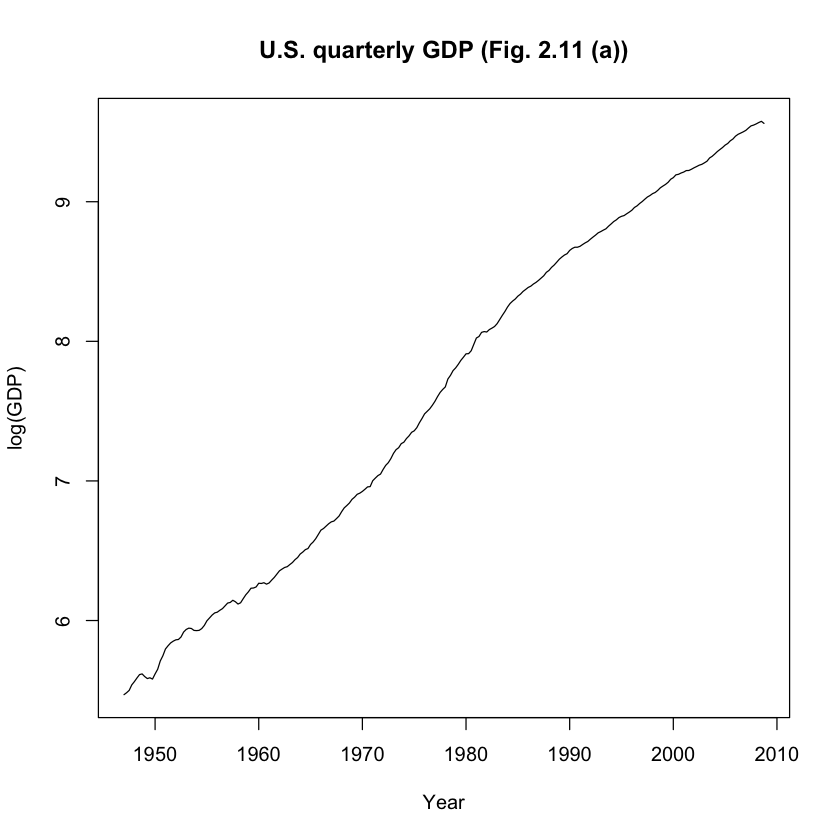

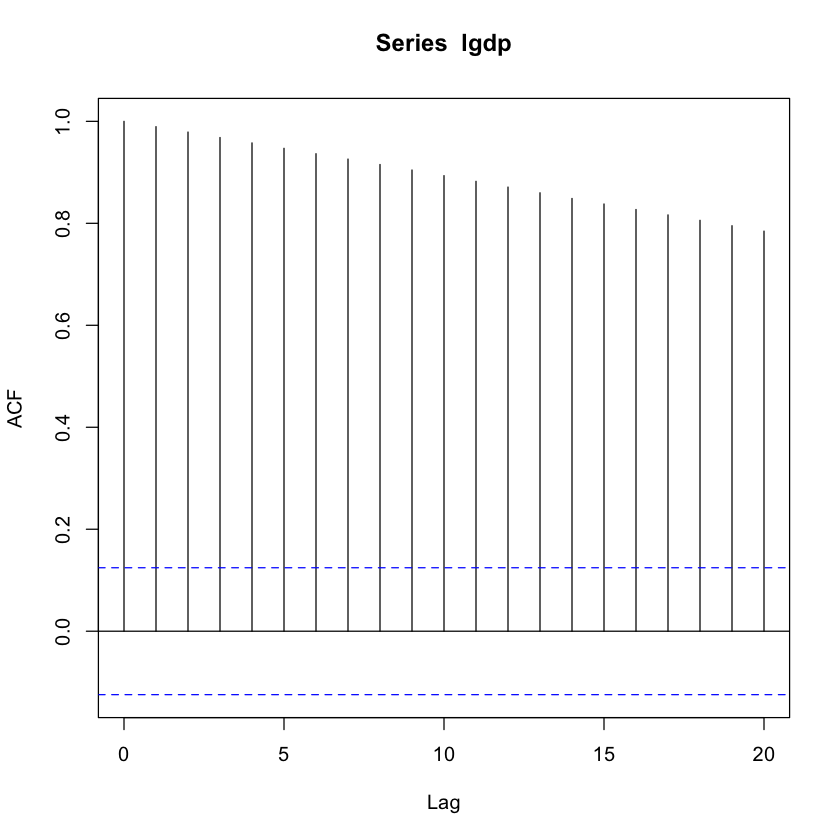

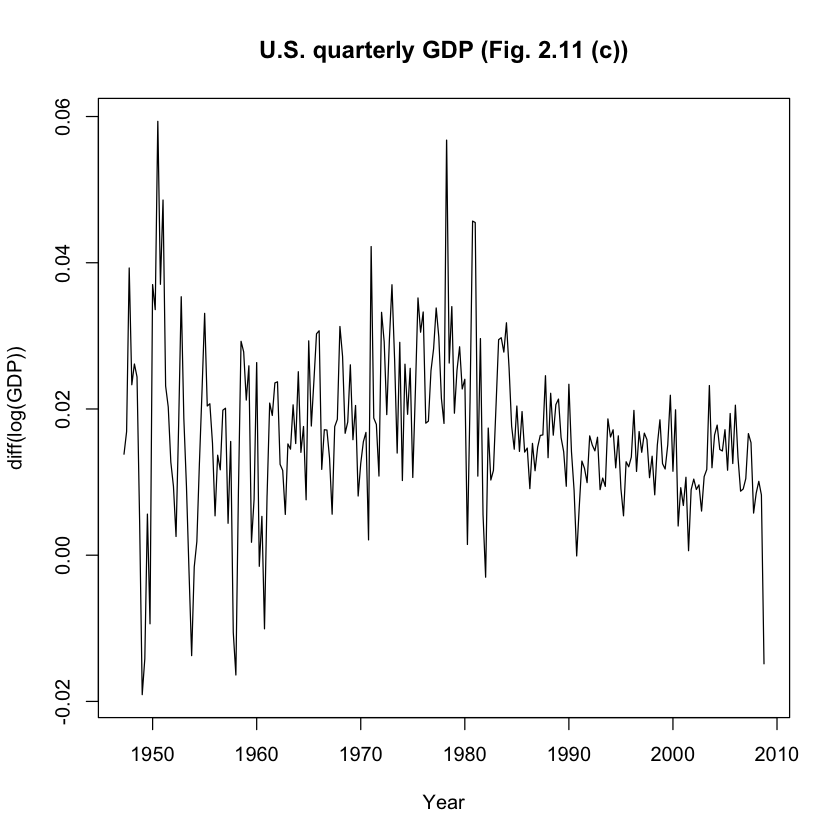

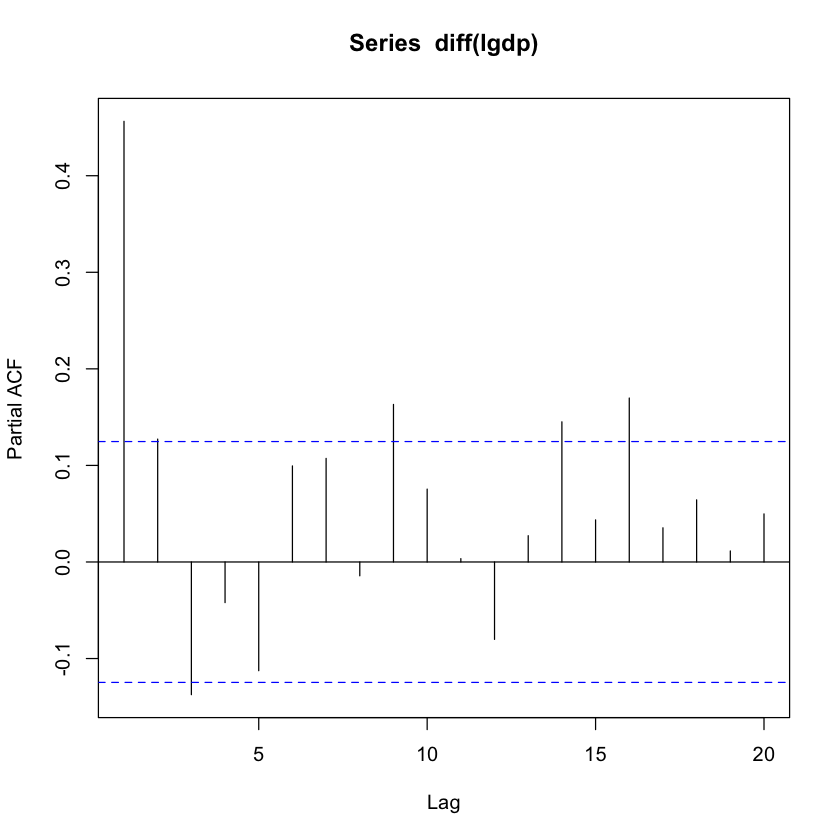

In [184]:
par(bg = "white")
lgdp_ts = ts(lgdp, frequency = 4, start = c(1947 ,1))
plot(lgdp_ts, col = 'black', type = 'l', main = 'U.S. quarterly GDP (Fig. 2.11 (a))', xlab = "Year", ylab = "log(GDP)")
acf(lgdp, lag.max = 20)
plot(diff(lgdp_ts), col = 'black', type = 'l', main = 'U.S. quarterly GDP (Fig. 2.11 (c))', xlab = "Year", ylab = "diff(log(GDP))")
pacf(diff(lgdp), lag.max = 20)

## Unit root test (S&P 500)

In [207]:
# install.packages("RQuantLib")

also installing the dependencies ‘Rcpp’, ‘zoo’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [209]:
load_quantlib_calendars(ql_calendars = NULL, from = 1950, to = 2008, financial = TRUE)

Calendar QuantLib/TARGET loaded

Calendar QuantLib/Argentina loaded

Calendar QuantLib/Australia loaded

Calendar QuantLib/Brazil loaded

Calendar QuantLib/Canada loaded

Calendar QuantLib/Canada/Settlement loaded

Calendar QuantLib/Canada/TSX loaded

Calendar QuantLib/China loaded

Calendar QuantLib/CzechRepublic loaded

Calendar QuantLib/Denmark loaded

Calendar QuantLib/Finland loaded

Calendar QuantLib/Germany loaded

Calendar QuantLib/Germany/FrankfurtStockExchange loaded

Calendar QuantLib/Germany/Settlement loaded

Calendar QuantLib/Germany/Xetra loaded

Calendar QuantLib/Germany/Eurex loaded

Calendar QuantLib/HongKong loaded

Calendar QuantLib/Hungary loaded

Calendar QuantLib/Iceland loaded

Calendar QuantLib/India loaded

Calendar QuantLib/Indonesia loaded

Calendar QuantLib/Italy loaded

Calendar QuantLib/Italy/Settlement loaded

Calendar QuantLib/Italy/Exchange loaded

Calendar QuantLib/Japan loaded

Calendar QuantLib/Mexico loaded

Calendar QuantLib/NewZealand loaded

Cal

In [185]:
da = read.table("../AFTS_data/Ch02/d-sp55008.txt", header = T)
da[1:10,]; dim(da)

,year,mon,day,open,high,low,close,volume,adjclose
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1950,1,3,16.66,16.66,16.66,16.66,1260000,16.66
2,1950,1,4,16.85,16.85,16.85,16.85,1890000,16.85
3,1950,1,5,16.93,16.93,16.93,16.93,2550000,16.93
4,1950,1,6,16.98,16.98,16.98,16.98,2010000,16.98
5,1950,1,9,17.08,17.08,17.08,17.08,2520000,17.08
6,1950,1,10,17.03,17.03,17.03,17.03,2160000,17.03
7,1950,1,11,17.09,17.09,17.09,17.09,2630000,17.09
8,1950,1,12,16.76,16.76,16.76,16.76,2970000,16.76
9,1950,1,13,16.67,16.67,16.67,16.67,3330000,16.67


[1] 14662     9

In [193]:
length(lsp5)

[1] 14662

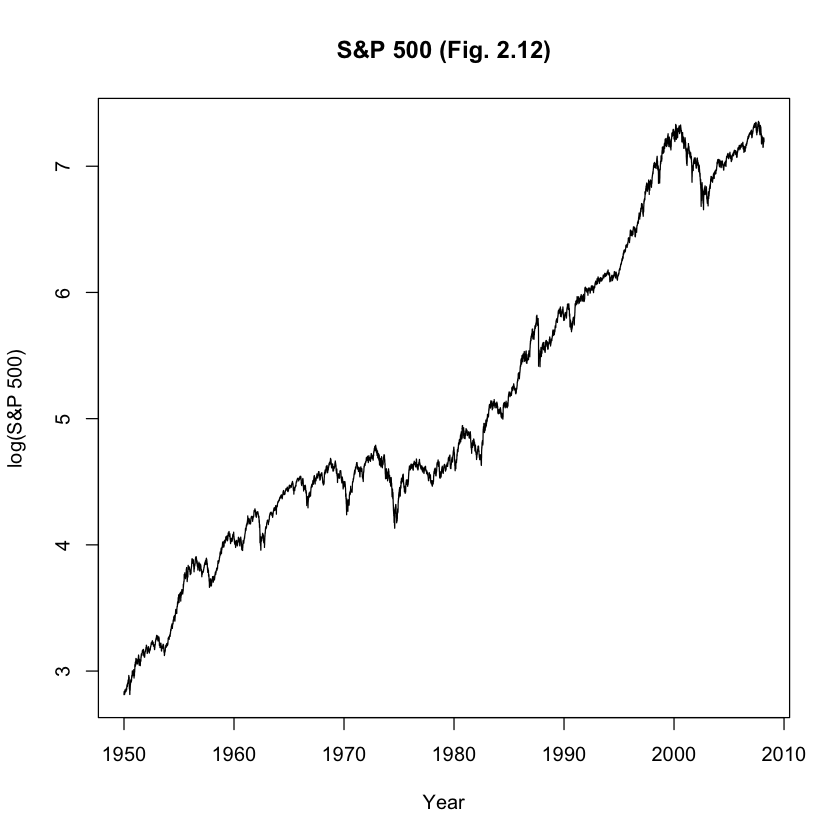

In [218]:
lsp5 = log(da$close)
par(bg = "white")
lsp5_ts = ts(lsp5, frequency = 252, start = c(1950 , 1, 3))
plot(lsp5_ts, col = 'black', type = 'l', main = 'S&P 500 (Fig. 2.12)', xlab = "Year", ylab = "log(S&P 500)")

In [186]:
m2 = ar(diff(lsp5), method = 'mle')
m2$order

[1] 2

In [187]:
adfTest(lsp5, lags = 2, type = ("ct"))


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 2
  STATISTIC:
    Dickey-Fuller: -2.0179
  P VALUE:
    0.5708 

Description:
 Wed Feb 14 03:51:59 2024 by user: 

In [188]:
adfTest(lsp5, lags = 15, type = ("ct"))


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 15
  STATISTIC:
    Dickey-Fuller: -1.9946
  P VALUE:
    0.5807 

Description:
 Wed Feb 14 03:52:33 2024 by user: 